In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import *
from yellowbrick.features import PCA

# Analysis of Twibot-20 dataset
This section is used to analyze the Twibot-20 dataset (https://arxiv.org/abs/2106.13088)
## Load the train and test datasets

In [21]:
from datasets import load_twibot20

twibot20_train = load_twibot20(dataset='train')
twibot20_test = load_twibot20(dataset='test')

## Analyse the datasets

In [3]:
twibot20_train.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label
count,8.278000e+03,8.278000e+03,8278.000000,8278.000000,8.278000e+03,8278.000000
mean,6.464586e+05,6.609915e+03,1504.488524,13297.475477,2.158684e+04,0.561247
std,4.148888e+06,6.377857e+04,9855.072510,40415.682739,9.008918e+04,0.496265
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,2.010000e+02,2.310000e+02,0.000000,146.000000,4.050000e+02,0.000000
50%,1.939500e+03,7.230000e+02,13.000000,1584.500000,3.624000e+03,1.000000
75%,3.762050e+04,2.124000e+03,258.000000,9121.250000,1.572975e+04,1.000000
max,1.124032e+08,4.339982e+06,550181.000000,783456.000000,5.140025e+06,1.000000


In [4]:
twibot20_test.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label
count,1.183000e+03,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,8.231450e+05,6449.619611,1864.894336,12514.628064,21437.875740,0.540997
std,5.577725e+06,40365.824629,9400.150853,29729.397790,57544.176485,0.498527
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.145000e+02,234.500000,1.000000,159.500000,381.000000,0.000000
50%,2.574000e+03,748.000000,17.000000,1884.000000,4051.000000,1.000000
75%,4.764750e+04,2051.500000,331.500000,10001.000000,19556.000000,1.000000
max,8.731376e+07,804528.000000,118656.000000,322238.000000,859809.000000,1.000000


The train and test datasets have 8278 and 1183 entries, respectively.

In [5]:
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   location                      8278 non-null   object             
 3   profile_location              728 non-null    object             
 4   description                   8278 non-null   object             
 5   url                           4028 non-null   object             
 6   entities                      8278 non-null   object             
 7   protected                     8278 non-null   bool               
 8   followers_count               8278 non-null   int64              
 9   friends_count                 8278 non-null   int64              
 10  listed_count             

In [6]:
# Show a sample of 3 accounts from the dataset
twibot20_train.sample(3)

,name,screen_name,location,profile_location,description,url,entities,protected,followers_count,friends_count,...,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,label,probe_date
id,,,,,,,,,,,,,,,,,,,,,
1275501840822566918,Serenity_sex_datings,SexSerenity,,None,Want have sex with me? 😈 Find me at my profile...,None,{'description': {'urls': [{'url': 'https://t.c...,False,266,1547,...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,1,2020-09-06 00:00:00+00:00
16991392,Dr. Geffin,Dr_Geffin,"Boston, MA","{'id': '67b98f17fdcf20be', 'url': 'https://api...",Chief Medical Officer and Director of Advanced...,https://t.co/ClOToYYSVf,{'url': {'urls': [{'url': 'https://t.co/ClOToY...,False,4988,5479,...,0084B4,FFFFFF,DDEEF6,333333,False,False,False,False,1,2020-09-06 00:00:00+00:00
2282413220,saidulu mattapally,mattapallysaidu,United States,"{'id': '96683cc9126741d1', 'url': 'https://api...","Research Scholar, Author, Interpreter, Philoso...",https://t.co/Z767WZSY0T,{'url': {'urls': [{'url': 'https://t.co/Z767WZ...,False,8662,9142,...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,1,2020-09-06 00:00:00+00:00


The dataset contains various information provided by the Twitter API. We have access to the account name called "name", the unique username called "screen_name", the location, the description, the number of followers/friends/lists/favorites/statuses, the date of creation, if the account has been verified by Twitter. All the attributes and their description are available at https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user.

Two additional columns are present: the label identifies whether the user is a bot (1) or not (0), the probe_date is used to describe when the data was collected.

Many columns are irrelevant for the detection of bots, we can remove them. We start with the boolean columns:

In [7]:
for col in twibot20_train.select_dtypes(include=['bool']).columns:
    print(f"{col}:")
    print(twibot20_train[col].value_counts())
    print('')

protected:
False    8277
True        1
Name: protected, dtype: int64

geo_enabled:
False    4823
True     3455
Name: geo_enabled, dtype: int64

verified:
False    6221
True     2057
Name: verified, dtype: int64

contributors_enabled:
False    8278
Name: contributors_enabled, dtype: int64

is_translator:
False    8276
True        2
Name: is_translator, dtype: int64

is_translation_enabled:
False    8106
True      172
Name: is_translation_enabled, dtype: int64

profile_background_tile:
False    6895
True     1383
Name: profile_background_tile, dtype: int64

profile_use_background_image:
True     6878
False    1400
Name: profile_use_background_image, dtype: int64

has_extended_profile:
False    5227
True     3051
Name: has_extended_profile, dtype: int64

default_profile:
False    4176
True     4102
Name: default_profile, dtype: int64

default_profile_image:
False    8071
True      207
Name: default_profile_image, dtype: int64



We conclude that the protected column can be removed as the values are mostly False and it has been deprecated by the Twitter API. We can remove contributors_enabled, is_translation_enabled, is_translator and profile_location for the same reasons.

We also remove columns that only contain empty values and irrelevant columns (colors, profile/background urls). 

In [22]:
from datasets import remove_useless_api_columns

twibot20_train = remove_useless_api_columns(twibot20_train)
twibot20_test = remove_useless_api_columns(twibot20_test)
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   location                      8278 non-null   object             
 3   description                   8278 non-null   object             
 4   url                           4028 non-null   object             
 5   followers_count               8278 non-null   int64              
 6   friends_count                 8278 non-null   int64              
 7   listed_count                  8278 non-null   int64              
 8   created_at                    8278 non-null   datetime64[ns, UTC]
 9   favourites_count              8278 non-null   int64              
 10  geo_enabled              

## Feature engineering
At the moment we are somewhat limited in the number of available features. We will use feature engineering with methods found in (https://arxiv.org/abs/1911.09179), as well as our own features.

(https://arxiv.org/abs/1911.09179) adds the user_age, tweet_freq, followers/friends/favourites/listed_growth_rate, followers_friends_ratio, (screen_)name_length, description_length, num_digits_in_(screen_)name. We also replace location and url by two booleans indicating whether the field is non-null.

In [24]:
from datasets import feature_engineering

twibot20_train = feature_engineering(twibot20_train)
twibot20_train.sort_index(axis=1, inplace=True)

twibot20_test = feature_engineering(twibot20_test)
twibot20_test.sort_index(axis=1, inplace=True)
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    8278 non-null   datetime64[ns, UTC]
 1   default_profile               8278 non-null   bool               
 2   default_profile_image         8278 non-null   bool               
 3   description                   8278 non-null   object             
 4   description_length            8278 non-null   int64              
 5   favourites_count              8278 non-null   int64              
 6   favourites_growth_rate        8278 non-null   float64            
 7   followers_count               8278 non-null   int64              
 8   followers_friends_ratio       8278 non-null   float64            
 9   followers_growth_rate         8278 non-null   float64            
 10  friends_count            

In [10]:
twibot20_train.describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,8278.000000,8278.000000,8278.000000,8.278000e+03,8.278000e+03,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8278.000000,8.278000e+03,8278.000000,8.278000e+03
mean,83.046146,13297.475477,0.000094,6.464586e+05,2.860677e+04,0.002140,6.609915e+03,0.000039,0.561247,1504.488524,4.554513e-06,14.057381,0.104011,0.764557,12.139889,2.158684e+04,0.000096,2.230634e+08
std,55.984721,40415.682739,0.000317,4.148888e+06,9.288078e+05,0.012462,6.377857e+04,0.000233,0.496265,9855.072510,2.688255e-05,6.125798,0.596134,1.756609,2.710466,9.008918e+04,0.000321,1.229977e+08
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,3.000000,0.000000e+00,0.000000,1.442620e+05
25%,30.000000,146.000000,0.000001,2.010000e+02,3.266071e-01,0.000002,2.310000e+02,0.000001,0.000000,0.000000,0.000000e+00,11.000000,0.000000,0.000000,10.000000,4.050000e+02,0.000003,1.153540e+08
50%,86.000000,1584.500000,0.000009,1.939500e+03,1.040150e+00,0.000012,7.230000e+02,0.000004,1.000000,13.000000,7.091948e-08,14.000000,0.000000,0.000000,12.000000,3.624000e+03,0.000019,2.493283e+08
75%,138.000000,9121.250000,0.000051,3.762050e+04,2.620716e+01,0.000180,2.124000e+03,0.000014,1.000000,258.000000,1.075070e-06,17.000000,0.000000,1.000000,14.000000,1.572975e+04,0.000073,3.348414e+08
max,202.000000,783456.000000,0.006245,1.124032e+08,5.828524e+07,0.311287,4.339982e+06,0.012088,1.000000,550181.000000,1.523659e-03,51.000000,10.000000,13.000000,16.000000,5.140025e+06,0.015001,4.563762e+08


In [11]:
twibot20_train.sample(5)

,created_at,default_profile,default_profile_image,description,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,...,probe_date,profile_background_tile,profile_use_background_image,screen_name,screen_name_length,statuses_count,tweet_freq,url,user_age,verified
id,,,,,,,,,,,,,,,,,,,,,
822694394666983424,2017-01-21 06:36:43+00:00,False,False,"💞=2 lives. Do or do not, trying takes too long...",157,43181,0.000378,23507,1.008538,0.000206,...,2020-09-06 00:00:00+00:00,False,False,RUUnmasked,11,31537,2.757459e-04,None,114369797.0,False
22818291,2009-03-04 19:15:53+00:00,False,False,Entrepreneur,13,9408,0.000026,814,0.527886,0.000002,...,2020-09-06 00:00:00+00:00,False,True,rjventco,9,3173,8.737286e-06,None,363156247.0,False
1107784952559611909,2019-03-18 23:24:49+00:00,True,False,Steel Industry company ☀I have 25 years of gen...,158,124,0.000003,134,0.114432,0.000003,...,2020-09-06 00:00:00+00:00,False,True,MathewCramer2,14,10,2.155223e-07,None,46398911.0,False
22699692,2009-03-03 23:30:04+00:00,False,False,"English born, US Citizen. Lifelong LUFC Fan. L...",152,62415,0.000172,2580,0.516517,0.000007,...,2020-09-06 00:00:00+00:00,False,True,darrenkemp,11,3398,9.355021e-06,None,363227396.0,False
810513498665086976,2016-12-18 15:54:11+00:00,False,False,"Indivisible Austin’s mission is to celebrate, ...",134,14409,0.000123,8749,6.466371,0.000075,...,2020-09-06 00:00:00+00:00,False,False,indivisibleATX,15,27797,2.370262e-04,https://t.co/nGVi81o6KX,117273949.0,False


## Analysis of the features

In [13]:
print("Train dataset")
print("Number of users: {}".format(len(twibot20_train)))
print("Number of verified users: {}".format(twibot20_train['verified'].sum()))

Train dataset
Number of users: 8278
Number of verified users: 2057


In [14]:
print("Test dataset")
print("Number of users: {}".format(len(twibot20_test)))
print("Number of verified users: {}".format(twibot20_test['verified'].sum()))

Test dataset
Number of users: 1183
Number of verified users: 326


In [15]:
print('Sample of legitimate users:')
for idx, profile in twibot20_train[twibot20_train['label'] == 0].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of legitimate users:
https://twitter.com/_Voto2012 
https://twitter.com/lorenaoneil 
https://twitter.com/kerrywashington 
https://twitter.com/mphrost 
https://twitter.com/LiquidRiversan 
https://twitter.com/TXT_bighit_jp 
https://twitter.com/JustinElliott 
https://twitter.com/PeterAIIen1 
https://twitter.com/ChenMusic 
https://twitter.com/tylerjaytweets 


In [16]:
print('Sample of bots:')
for idx, profile in twibot20_train[twibot20_train['label'] == 1].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of bots:
https://twitter.com/providence2884 
https://twitter.com/DHSeTV 
https://twitter.com/RoryGreenfield 
https://twitter.com/buyucuvoldemort 
https://twitter.com/harmonylei 
https://twitter.com/CurveFinance 
https://twitter.com/bridgesofficial 
https://twitter.com/lies_face 
https://twitter.com/clistermusic 
https://twitter.com/carlosfiru2 


### 2D PCA analysis

<IPython.core.display.Javascript object>


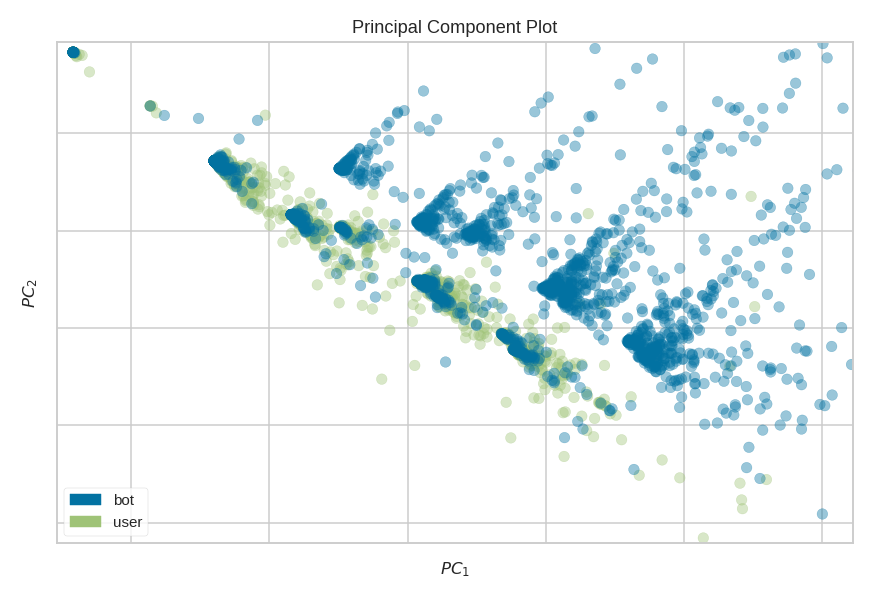

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [23]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, projection=2,
                classes=['bot', 'user'],
                random_state=265,# proj_features=True,
                alpha=0.4)

data = pd.concat([twibot20_train[twibot20_train['label'] == 1].sample(2000), twibot20_train[twibot20_train['label'] == 0].sample(2000)])
X = data.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
visualizer.fit_transform(X, data['label'].astype(int))
visualizer.show()

### Compute the reputation of the dataset

In [27]:
# Account reputation based on Z. Chu, S. Gianvecchio, H. Wang and S. Jajodia, "Detecting Automation of Twitter Accounts: Are You a Human, Bot, or Cyborg?," in IEEE Transactions on Dependable and Secure Computing, vol. 9, no. 6, pp. 811-824, Nov.-Dec. 2012, doi: 10.1109/TDSC.2012.75.
def reputation(user):
    a = abs(user['followers_count'])
    b = abs(user['followers_count']) + abs(user['friends_count'])
    
    return a / b if b != 0 else 0

print('Mean reputation of twibot20_train: {}'.format(twibot20_train.apply(reputation, axis=1).mean()))
print('Mean reputation of twibot20_test : {}\n'.format(twibot20_test.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in twibot20_train: {}'.format(twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of bots in twibot20_test : {}\n'.format(twibot20_test[twibot20_test['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in twibot20_train: {}'.format(twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1).mean()))
print('Mean reputation of users in twibot20_test : {}'.format(twibot20_test[twibot20_test['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of twibot20_train: 0.5674009934923705
Mean reputation of twibot20_test : 0.5790589291082497

Mean reputation of bots in twibot20_train: 0.43975627325969713
Mean reputation of bots in twibot20_test : 0.43376147239652296

Mean reputation of users in twibot20_train: 0.7306822077547602
Mean reputation of users in twibot20_test : 0.7503119167611139


## Random forest models
In this section we build a random forest model for TwiBot-20 and analyse the results

In [158]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200, class_weight="balanced")

# Random forest model only on bool, int64 and float64
X_train = twibot20_train.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_train = twibot20_train['label']

X_test = twibot20_test.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_test = twibot20_test['label']

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.8157227387996618
[[351 192]
 [ 26 614]]


In [36]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

verified                        0.193635
followers_friends_ratio         0.110188
followers_count                 0.078397
listed_count                    0.071204
user_age                        0.056218
followers_growth_rate           0.052696
statuses_count                  0.050093
friends_count                   0.050023
description_length              0.045676
favourites_count                0.045270
friends_growth_rate             0.041090
tweet_freq                      0.040057
favourites_growth_rate          0.038080
name_length                     0.035546
screen_name_length              0.027875
listed_growth_rate              0.019221
num_digits_in_screen_name       0.014181
geo_enabled                     0.009403
has_url                         0.008149
default_profile                 0.005892
profile_use_background_image    0.003891
num_digits_in_name              0.003215
dtype: float64

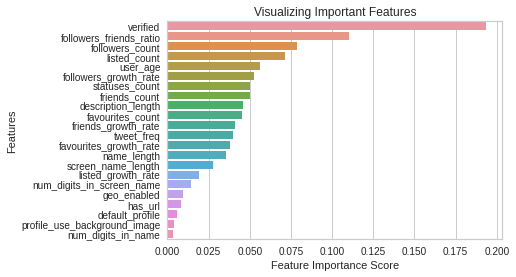

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Cresci-2017 dataset
## Loading the dataset

In [38]:
from datasets import load_cresci17
cresci17_raw = load_cresci17()
cresci17_raw.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,utc_offset,is_translator,follow_request_sent,protected,notifications,contributors_enabled,following,test_set_1,test_set_2,label
count,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,5015.000000,1.0,0.0,78.0,0.0,0.0,0.0,4465.000000,3938.000000,11017.000000
mean,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,-5901.954138,1.0,NaN,1.0,NaN,NaN,NaN,0.445913,0.242255,0.684669
std,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,18906.166175,NaN,NaN,0.0,NaN,NaN,NaN,0.497122,0.428502,0.464669
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-39600.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,46.000000,6.000000e+00,40.000000,0.000000,0.000000,-18000.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,99.000000,1.310000e+02,202.000000,0.000000,1.000000,-14400.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,1.000000
75%,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,10800.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.000000,0.000000,1.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,46800.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [46]:
from datasets import remove_cresci17_extra_columns

cresci17 = feature_engineering(remove_useless_api_columns(remove_cresci17_extra_columns(cresci17_raw)))
cresci17.sort_index(axis=1, inplace=True)
cresci17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 1502026416 to 2438666143
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    11017 non-null  datetime64[ns, UTC]
 1   default_profile               11017 non-null  bool               
 2   default_profile_image         11017 non-null  bool               
 3   description                   11017 non-null  object             
 4   description_length            11017 non-null  int64              
 5   favourites_count              11017 non-null  int64              
 6   favourites_growth_rate        11017 non-null  float64            
 7   followers_count               11017 non-null  int64              
 8   followers_friends_ratio       11017 non-null  float64            
 9   followers_growth_rate         11017 non-null  float64            
 10  friends_count       

In [47]:
cresci17[cresci17['label'] == 1].describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,7543.000000,7543.000000,7.543000e+03,7.543000e+03,7543.000000,7.543000e+03,7543.000000,7.543000e+03,7543.0,7543.000000,7.543000e+03,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7.543000e+03,7.543000e+03
mean,38.524990,29.011401,2.417286e-07,1.004364e+03,1.691018,5.916665e-06,666.495957,4.471507e-06,1.0,12.272571,7.468661e-08,13.297362,0.017897,0.323876,12.232268,1802.219144,2.645538e-05,1.269838e+08
std,50.906947,827.110852,7.584605e-06,3.521221e+04,66.400601,1.616862e-04,3508.443412,1.850331e-05,0.0,352.448966,1.555076e-06,3.433963,0.364237,1.016554,1.937401,7873.271121,1.604705e-04,7.858123e+07
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,0.000000,0.000000e+00,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000e+00,9.134916e+06
25%,0.000000,0.000000,0.000000e+00,4.000000e+00,0.104080,6.277894e-08,38.000000,5.899964e-07,1.0,0.000000,0.000000e+00,12.000000,0.000000,0.000000,11.000000,41.000000,4.381503e-07,6.464463e+07
50%,0.000000,0.000000,0.000000e+00,1.100000e+01,0.197847,1.560124e-07,45.000000,6.986863e-07,1.0,0.000000,0.000000e+00,13.000000,0.000000,0.000000,12.000000,60.000000,8.365916e-07,6.601967e+07
75%,86.000000,0.000000,0.000000e+00,3.170000e+02,0.879631,1.798125e-06,525.500000,2.462455e-06,1.0,4.000000,2.633157e-08,15.000000,0.000000,0.000000,14.000000,131.000000,1.177682e-06,2.058849e+08
max,298.000000,50699.000000,5.438462e-04,2.991573e+06,4794.333333,1.346266e-02,211890.000000,9.535460e-04,1.0,24348.000000,1.095707e-04,48.000000,25.000000,9.000000,15.000000,214410.000000,4.277915e-03,2.725346e+08


In [48]:
cresci17[cresci17['label'] == 0].describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3.474000e+03,3474.000000,3474.000000,3474.0,3474.000000,3.474000e+03,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3.474000e+03,3.474000e+03
mean,63.778066,4669.620322,0.000044,1393.219632,3.603895,9.958540e-06,633.242372,0.000005,0.0,19.496546,1.178786e-07,10.354347,0.049511,0.461716,10.862982,16958.220207,1.313209e-04,1.331680e+08
std,50.882751,11527.566663,0.000109,17216.664524,32.936349,7.496126e-05,1600.962972,0.000012,0.0,157.740969,7.707258e-07,4.785187,0.338304,1.072308,2.541494,30696.286104,2.519833e-04,6.028598e+07
min,0.000000,0.000000,0.000000,1.000000,0.000000,7.860879e-09,0.000000,0.000000,0.0,0.000000,0.000000e+00,1.000000,0.000000,0.000000,3.000000,3.000000,2.358264e-08,2.854236e+07
25%,20.000000,261.250000,0.000002,149.000000,0.586036,1.258163e-06,169.000000,0.000001,0.0,0.000000,0.000000e+00,6.000000,0.000000,0.000000,9.000000,1810.250000,1.614622e-05,8.199619e+07
50%,51.000000,1286.000000,0.000012,341.000000,1.026422,2.910664e-06,319.000000,0.000003,0.0,2.000000,1.826215e-08,11.000000,0.000000,0.000000,11.000000,6609.000000,5.375663e-05,1.304497e+08
75%,106.750000,4727.000000,0.000042,803.750000,1.575312,6.485943e-06,635.750000,0.000005,0.0,8.000000,6.147989e-08,14.000000,0.000000,0.000000,13.000000,19467.000000,1.484714e-04,1.833533e+08
max,160.000000,313954.000000,0.003026,986837.000000,1102.000000,4.079704e-03,46310.000000,0.000375,0.0,6166.000000,3.239047e-05,20.000000,5.000000,11.000000,15.000000,399555.000000,6.509910e-03,2.886269e+08


## PCA analysis

<IPython.core.display.Javascript object>


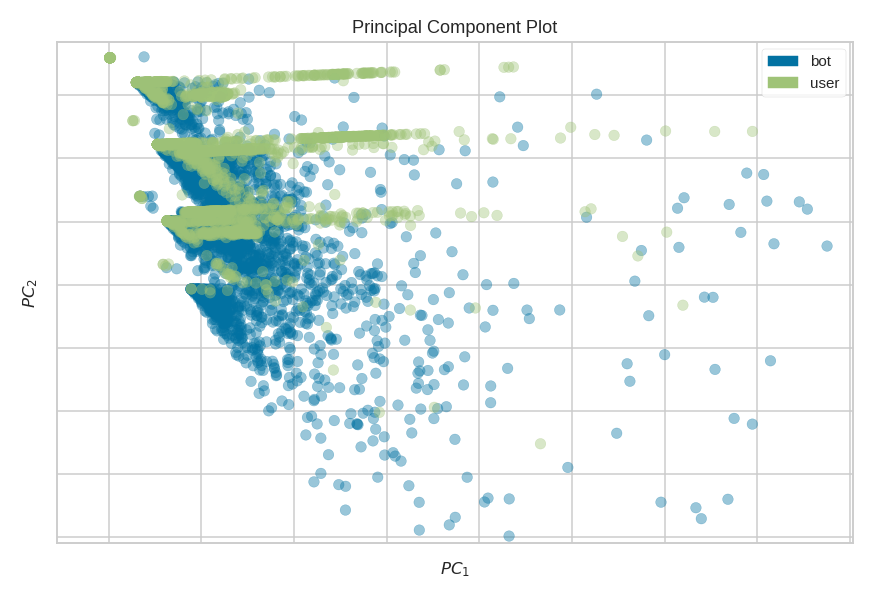

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [44]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, projection=2,
                classes=['bot', 'user'],
                random_state=265,# proj_features=True,
                alpha=0.4)

X = cresci17.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
visualizer.fit_transform(X, cresci17['label'].astype(int))
visualizer.show()

## Reputation

In [49]:
print('Mean reputation of cresci17 : {}\n'.format(cresci17.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in cresci17 : {}\n'.format(cresci17[cresci17['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in cresci17 : {}'.format(cresci17[cresci17['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of cresci17 : 0.33833945494277506

Mean reputation of bots in cresci17 : 0.262608382793261

Mean reputation of users in cresci17 : 0.5027722347999382


## Random forest model

In [160]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
X = cresci17.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y = cresci17['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

In [161]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50, class_weight="balanced")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9851485148514851
[[1121   22]
 [  32 2461]]


In [162]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

favourites_count                0.399599
tweet_freq                      0.145341
statuses_count                  0.113557
favourites_growth_rate          0.107307
friends_count                   0.044845
followers_count                 0.033363
user_age                        0.031607
geo_enabled                     0.026086
description_length              0.020945
followers_friends_ratio         0.016583
default_profile                 0.015096
friends_growth_rate             0.007924
name_length                     0.007282
listed_count                    0.007250
followers_growth_rate           0.006186
screen_name_length              0.005276
profile_background_tile         0.002906
num_digits_in_screen_name       0.002500
has_url                         0.002300
listed_growth_rate              0.002103
profile_use_background_image    0.001616
default_profile_image           0.000184
num_digits_in_name              0.000131
verified                        0.000013
dtype: float64

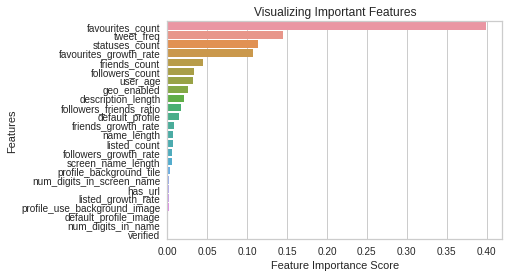

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Midterm-2018 dataset

In [58]:
from datasets import load_midterm18
midterm18_raw = load_midterm18()
midterm18_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50538 entries, 4107317134 to 1078964200234536960
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   probe_date                    50538 non-null  datetime64[ns, UTC]
 1   screen_name                   50538 non-null  object             
 2   name                          50538 non-null  object             
 3   description                   50538 non-null  object             
 4   created_at                    50538 non-null  datetime64[ns, UTC]
 5   url                           7473 non-null   object             
 6   lang                          50538 non-null  object             
 7   protected                     46995 non-null  float64            
 8   verified                      50538 non-null  bool               
 9   geo_enabled                   50538 non-null  bool               
 10  profile_use

In [59]:
midterm18_raw.sample(3)

,probe_date,screen_name,name,description,created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,label
id,,,,,,,,,,,,,,,,,,,
3193625862,2018-11-06 16:24:06+00:00,peterstarrk,liz,"“look at you, a garden of the galaxy!” - @strl...",2015-05-12 22:19:52+00:00,http://elizaa.carrd.co,en,0.0,False,True,False,False,3137,1383,101,20004,56878,1059843880080818177,0
1076306769293594626,2018-12-22 02:57:10+00:00,dollie79542476,dollie,,2018-12-22 02:41:45+00:00,None,en,0.0,False,False,True,True,0,0,0,0,14,1076310651977519105,1
709560250924474368,2018-11-06 17:39:20+00:00,laurenkkraus,Lauren Kraus,Wife•Mother•Trump Supporter• #MAGA,2016-03-14 22:02:01+00:00,None,en,NaN,False,False,True,True,460,590,5,157,527,1059938309768667137,0


In [62]:
from datasets import remove_midterm18_extra_columns

midterm18 = feature_engineering(remove_useless_api_columns(remove_midterm18_extra_columns(midterm18_raw)))
midterm18.sort_index(axis=1, inplace=True)
midterm18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50538 entries, 4107317134 to 1078964200234536960
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    50538 non-null  datetime64[ns, UTC]
 1   default_profile               50538 non-null  bool               
 2   description                   50538 non-null  object             
 3   description_length            50538 non-null  int64              
 4   favourites_count              50538 non-null  int64              
 5   favourites_growth_rate        50538 non-null  float64            
 6   followers_count               50538 non-null  int64              
 7   followers_friends_ratio       50538 non-null  float64            
 8   followers_growth_rate         50538 non-null  float64            
 9   friends_count                 50538 non-null  int64              
 10  friends_gro

In [63]:
# Bots
midterm18[midterm18['label'] == 1].describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,42446.000000,42446.000000,42446.000000,42446.000000,42446.000000,42446.000000,42446.000000,4.244600e+04,42446.0,42446.000000,42446.000000,42446.000000,42446.00000,42446.000000,42446.000000,42446.000000,4.244600e+04,4.244600e+04
mean,23.759530,79.029897,0.000799,19.215733,0.220404,0.000160,76.094873,2.927586e-03,1.0,0.086675,0.000003,10.735970,0.27098,3.791830,13.152924,123.424092,3.901101e-03,4.861550e+06
std,42.497511,757.273072,0.005801,145.942934,9.621636,0.001017,232.617444,1.611199e-02,0.0,0.851545,0.000035,5.098909,1.40164,3.377385,2.289735,892.559321,1.319000e-02,1.740922e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,1.000000,3.209499e-08,2.100000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,0.000000,0.000000,7.000000,0.00000,1.000000,12.000000,7.000000,3.534647e-05,3.190000e+03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.617800e-07,1.0,0.000000,0.000000,11.000000,0.00000,2.000000,14.000000,20.000000,2.963464e-04,1.577820e+05
75%,35.000000,9.000000,0.000049,2.000000,0.029851,0.000010,54.000000,3.453623e-04,1.0,0.000000,0.000000,14.000000,0.00000,8.000000,15.000000,69.000000,2.724796e-03,5.993670e+05
max,197.000000,74484.000000,0.255042,11598.000000,1893.200000,0.058093,10937.000000,6.857143e-01,1.0,137.000000,0.002591,50.000000,47.00000,14.000000,15.000000,80487.000000,4.245283e-01,1.443772e+08


In [64]:
# Bots
midterm18[midterm18['label'] == 0].describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,8092.000000,8092.000000,8092.000000,8.092000e+03,8092.000000,8.092000e+03,8092.000000,8092.000000,8092.0,8092.000000,8.092000e+03,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000,8.092000e+03,8.092000e+03
mean,91.548443,14042.600346,0.000104,1.642847e+04,22.591701,6.603031e-05,1423.569451,0.000025,0.0,98.018660,4.042944e-07,12.787321,0.074147,0.560554,11.094167,14659.281142,8.631230e-05,1.953893e+08
std,52.815422,28918.900237,0.000276,5.803013e+05,451.419643,1.798455e-03,6540.220500,0.000813,0.0,1118.595029,3.626451e-06,6.239256,0.480688,1.169131,2.569375,31665.673860,2.099902e-04,9.904877e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.000000,1.000000,4.646877e-09,1.890000e+02
25%,45.000000,930.750000,0.000006,1.070000e+02,0.349002,7.640929e-07,211.000000,0.000001,0.0,1.000000,7.044214e-09,9.000000,0.000000,0.000000,9.000000,1067.750000,7.887683e-06,1.152331e+08
50%,99.000000,3983.500000,0.000024,3.620000e+02,0.733974,2.214643e-06,478.000000,0.000003,0.0,7.000000,4.063562e-08,12.000000,0.000000,0.000000,11.000000,4351.500000,2.620135e-05,2.140278e+08
75%,142.000000,13780.500000,0.000089,1.345250e+03,1.385854,8.263985e-06,1092.500000,0.000007,0.0,32.000000,1.610965e-07,15.000000,0.000000,0.000000,13.000000,14197.250000,7.773537e-05,2.904078e+08
max,168.000000,463821.000000,0.006548,5.086590e+07,26997.250000,1.564589e-01,298234.000000,0.070111,0.0,67930.000000,2.089465e-04,50.000000,16.000000,11.000000,15.000000,599307.000000,5.291005e-03,3.752213e+08


We can see that some features (profile_background_tile, location, default_profile_image) are missing from the dataset compared to TwiBot-20 and Cresci-17. This will have to be taken into consideration when mixing datasets.

### PCA analysis

<IPython.core.display.Javascript object>


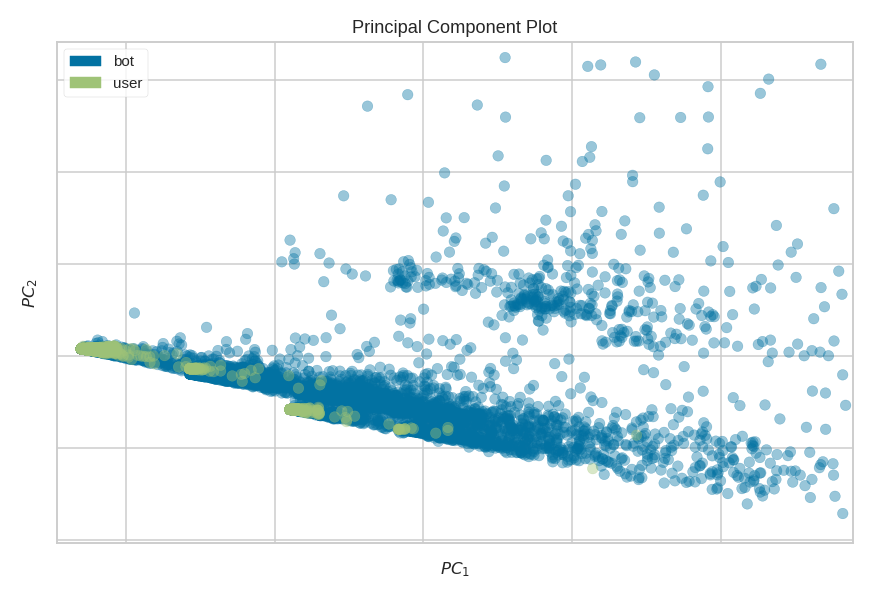

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [61]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, projection=2,
                classes=['bot', 'user'],
                random_state=265,# proj_features=True,
                alpha=0.4)

X = midterm18.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
visualizer.fit_transform(X, midterm18['label'].astype(int))
visualizer.show()

## Reputation

In [65]:
print('Mean reputation of midterm18 : {}\n'.format(midterm18.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in midterm18 : {}\n'.format(midterm18[midterm18['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in midterm18 : {}'.format(midterm18[midterm18['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of midterm18 : 0.19110602694413062

Mean reputation of bots in midterm18 : 0.14233387711910275

Mean reputation of users in midterm18 : 0.4469368069086799


## Random forest model

In [164]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
X = midterm18.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y = midterm18['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=90)

In [165]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=110, class_weight="balanced")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.9937642403165847
[[ 2607    64]
 [   40 13967]]


In [166]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

user_age                        0.343684
followers_count                 0.125896
favourites_count                0.100952
statuses_count                  0.091111
followers_friends_ratio         0.074044
listed_count                    0.047032
friends_count                   0.046292
default_profile                 0.031521
friends_growth_rate             0.030032
tweet_freq                      0.026590
description_length              0.017923
num_digits_in_screen_name       0.014181
followers_growth_rate           0.012433
geo_enabled                     0.011746
favourites_growth_rate          0.010647
screen_name_length              0.006756
name_length                     0.003291
profile_use_background_image    0.002076
listed_growth_rate              0.001626
has_url                         0.001397
num_digits_in_name              0.000467
verified                        0.000303
dtype: float64

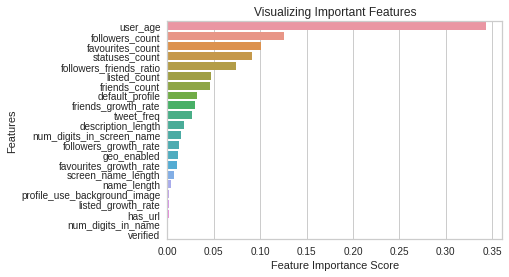

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Mixing datasets
## Comparing datasets reputations

In [168]:
twibot20_bots = twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1)
twibot20_users = twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1)

cresci17_bots = cresci17[cresci17['label'] == 1].apply(reputation, axis=1)
cresci17_users = cresci17[cresci17['label'] == 0].apply(reputation, axis=1)

midterm18_bots = midterm18[midterm18['label'] == 1].apply(reputation, axis=1)
midterm18_users = midterm18[midterm18['label'] == 0].apply(reputation, axis=1)

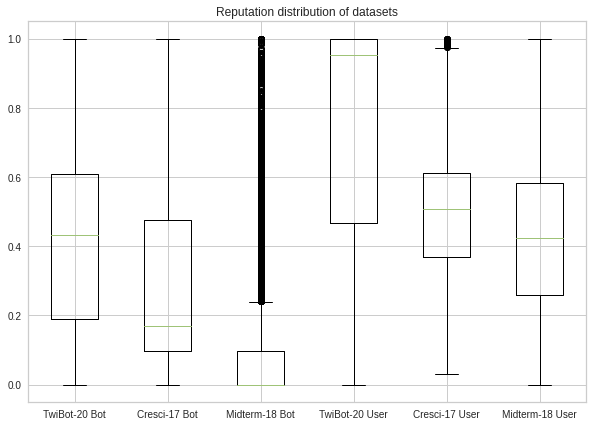

In [169]:
data = [twibot20_bots.values, cresci17_bots.values, midterm18_bots.values, twibot20_users.values, cresci17_users.values, midterm18_users.values]
labels = ['TwiBot-20 Bot', 'Cresci-17 Bot', 'Midterm-18 Bot', 'TwiBot-20 User', 'Cresci-17 User', 'Midterm-18 User']

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Reputation distribution of datasets')
ax.boxplot(data)
ax.set_xticklabels(labels);

In [170]:
print('Mean reputation of twibot20 : {}'.format(twibot20_train.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in twibot20 : {}'.format(twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in twibot20 : {}\n'.format(twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1).mean()))

print('Mean reputation of cresci17 : {}'.format(cresci17.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in cresci17 : {}'.format(cresci17[cresci17['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in cresci17 : {}\n'.format(cresci17[cresci17['label'] == 0].apply(reputation, axis=1).mean()))

print('Mean reputation of midterm18 : {}'.format(midterm18.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in midterm18 : {}'.format(midterm18[midterm18['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in midterm18 : {}\n'.format(midterm18[midterm18['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of twibot20 : 0.5674009934923705
Mean reputation of bots in twibot20 : 0.43975627325969713
Mean reputation of users in twibot20 : 0.7306822077547602

Mean reputation of cresci17 : 0.33833945494277506
Mean reputation of bots in cresci17 : 0.262608382793261
Mean reputation of users in cresci17 : 0.5027722347999382

Mean reputation of midterm18 : 0.19110602694413062
Mean reputation of bots in midterm18 : 0.14233387711910275
Mean reputation of users in midterm18 : 0.4469368069086799



## PCA
PCA on all three datasets at the same time.

<IPython.core.display.Javascript object>


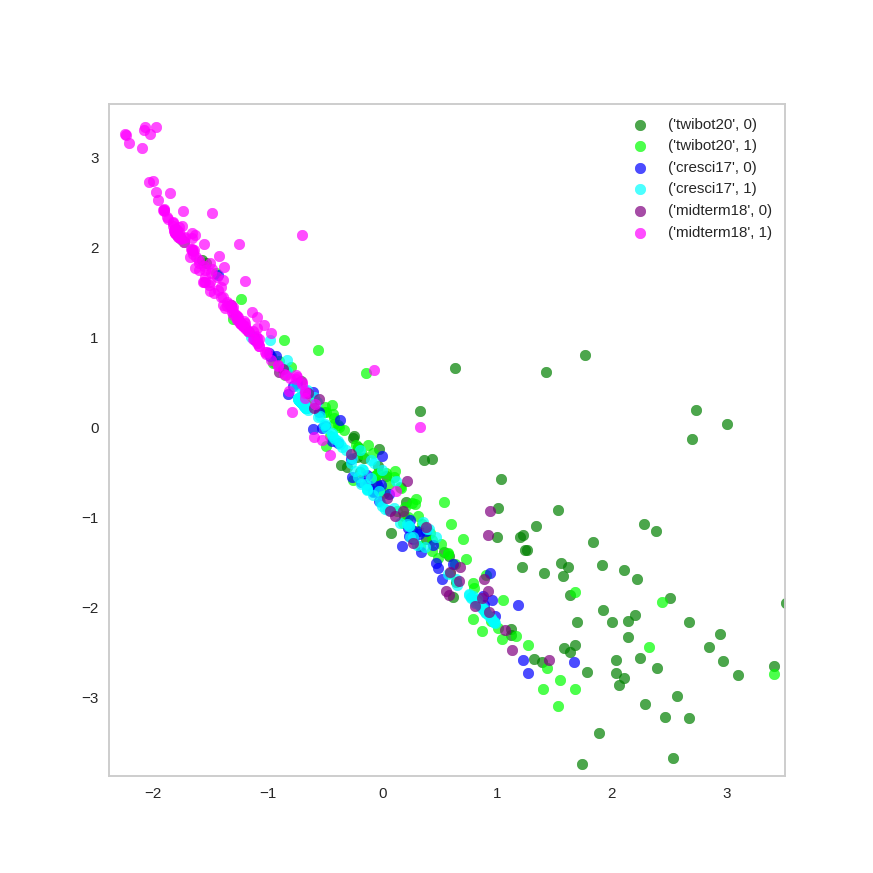

In [86]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

%matplotlib notebook

twibot20_pca = twibot20_train.sample(200).copy()
cresci17_pca = cresci17.sample(200).copy()
midterm18_pca = midterm18.sample(200).copy()

twibot20_pca['label'] = twibot20_pca['label'].apply(lambda lbl: ('twibot20', lbl))
cresci17_pca['label'] = cresci17_pca['label'].apply(lambda lbl: ('cresci17', lbl))
midterm18_pca['label'] = midterm18_pca['label'].apply(lambda lbl: ('midterm18', lbl))

data = pd.concat([twibot20_pca, cresci17_pca, midterm18_pca])
X_raw = data.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])

sc = StandardScaler()
sc.fit(X_raw)
X = sc.transform(X_raw)
y = data['label']

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

colors = [(("twibot20", 0), 'green'), (("twibot20", 1), 'lime'),
          (("cresci17", 0), 'blue'), (("cresci17", 1), 'cyan'),
          (("midterm18", 0), 'purple'), (("midterm18", 1), 'magenta')]
for label, c in colors:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7, label=label)

ax.legend()
ax.grid()
plt.show()


twibot20_pca = twibot20_pca[0:0]
cresci17_pca = cresci17_pca[0:0]
midterm18_pca = midterm18_pca[0:0]

## Generalization capabilities

Let's see whether the models trained on a dataset works on other datasets.

In [171]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
# Drop columns missing from midterm18
X_twibot20 = twibot20_train.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_twibot20 = twibot20_train['label']
X, y = X_twibot20, y_twibot20
X_twibot20_train, X_twibot20_test, y_twibot20_train, y_twibot20_test = train_test_split(X, y ,test_size=0.33, random_state=80, stratify=y)

X_cresci17 = cresci17.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_cresci17 = cresci17['label']
X, y = X_cresci17, y_cresci17
X_cresci17_train, X_cresci17_test, y_cresci17_train, y_cresci17_test = train_test_split(X, y,test_size=0.33, random_state=80, stratify=y)

X_midterm18 = midterm18.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_midterm18 = midterm18['label']
X, y = X_midterm18, y_midterm18
X_midterm18_train, X_midterm18_test, y_midterm18_train, y_midterm18_test = train_test_split(X, y,test_size=0.33, random_state=80, stratify=y)

### Model trained using TwiBot-20

In [172]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_train, y_twibot20_train)

y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)
y_midterm18_pred=clf.predict(X_midterm18_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of twibot20   :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print("                     f1:", metrics.f1_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[0, 1]))
print("Accuracy on cresci17   :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print("                     f1:", metrics.f1_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[0, 1]))
print("Accuracy on midterm18  :", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print("                     f1:", metrics.f1_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[0, 1]))

Accuracy of twibot20   : 0.8210102489019033
                     f1: 0.8590371865090803
[[ 753  446]
 [  43 1490]]
Accuracy on cresci17   : 0.7092959295929593
                     f1: 0.8248550124275063
[[  90 1057]
 [   0 2489]]
Accuracy on midterm18  : 0.7952392373186233
                     f1: 0.8845074233149582
[[  186  2484]
 [  931 13077]]


### Model trained using Cresci-17

In [173]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cresci17_train, y_cresci17_train)

y_cresci17_pred=clf.predict(X_cresci17_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_midterm18_pred=clf.predict(X_midterm18_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print("                   f1:", metrics.f1_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[0, 1]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print("                   f1:", metrics.f1_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[0, 1]))
print("Accuracy on midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print("                   f1:", metrics.f1_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[0, 1]))

Accuracy of cresci17 : 0.9854235423542355
                   f1: 0.9893338699939626
[[1125   22]
 [  31 2458]]
Accuracy on twibot20 : 0.46486090775988287
                   f1: 0.1410105757931845
[[1150   49]
 [1413  120]]
Accuracy on midterm18: 0.6785585801654874
                   f1: 0.7639261966621164
[[2643   27]
 [5334 8674]]


### Model trained using Midterm-18

In [174]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_midterm18_train, y_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print("                   f1:", metrics.f1_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[0, 1]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print("                   f1:", metrics.f1_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[0, 1]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print("                   f1:", metrics.f1_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[0, 1]))

Accuracy of midterm18: 0.9923851780789064
                   f1: 0.9954705945290487
[[ 2595    75]
 [   52 13956]]
Accuracy on twibot20 : 0.44546120058565153
                   f1: 0.10408042578356001
[[1129   70]
 [1445   88]]
Accuracy on cresci17 : 0.3173817381738174
                   f1: 0.01036682615629984
[[1141    6]
 [2476   13]]


### Mixing datasets
We attempt to use combinations of datasets to improve the generalization capabilites of our model.

In [175]:
from sklearn.model_selection import train_test_split

rand = 346
# Split the dataset into train, test
twibot20_sample = twibot20_train.sample(8000, random_state=rand)
cresci17_sample = cresci17.sample(3000, random_state=rand)
midterm18_sample = midterm18.sample(5000, random_state=rand)

# Drop columns missing from midterm18
X_twibot20 = twibot20_sample.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_twibot20 = twibot20_sample['label']
X_twibot20_train, X_twibot20_test, y_twibot20_train, y_twibot20_test = train_test_split(X_twibot20, y_twibot20,test_size=0.33, random_state=80)

X_cresci17 = cresci17_sample.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_cresci17 = cresci17_sample['label']
X_cresci17_train, X_cresci17_test, y_cresci17_train, y_cresci17_test = train_test_split(X_cresci17, y_cresci17,test_size=0.33, random_state=80)

X_midterm18 = midterm18_sample.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_midterm18 = midterm18_sample['label']
X_midterm18_train, X_midterm18_test, y_midterm18_train, y_midterm18_test = train_test_split(X_midterm18, y_midterm18,test_size=0.33, random_state=80)

#### Mixing cresci + midterm

In [176]:
# Cresci + midterm dataset
X_cresci17_midterm18_train = pd.concat([X_cresci17_train, X_midterm18_train])
y_cresci17_midterm18_train = pd.concat([y_cresci17_train, y_midterm18_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cresci17_midterm18_train, y_cresci17_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print("                   f1:", metrics.f1_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[0, 1]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print("                   f1:", metrics.f1_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[0, 1]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print("                   f1:", metrics.f1_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[0, 1]))

Accuracy of midterm18: 0.9927272727272727
                   f1: 0.995702005730659
[[ 248   10]
 [   2 1390]]
Accuracy on twibot20 : 0.49696969696969695
                   f1: 0.28755364806866957
[[1044  132]
 [1196  268]]
Accuracy on cresci17 : 0.9838383838383838
                   f1: 0.9879699248120302
[[317  10]
 [  6 657]]


#### Mixing twibot + cresci

In [177]:
# Twibot + cresci dataset
X_twibot20_cresci17_train = pd.concat([X_twibot20_train, X_cresci17_train ])
y_twibot20_cresci17_train = pd.concat([y_twibot20_train, y_cresci17_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_cresci17_train, y_twibot20_cresci17_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print("                   f1:", metrics.f1_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[0, 1]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print("                   f1:", metrics.f1_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[0, 1]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print("                   f1:", metrics.f1_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[0, 1]))

Accuracy of midterm18: 0.8042424242424242
                   f1: 0.8843537414965986
[[  92  166]
 [ 157 1235]]
Accuracy on twibot20 : 0.8056818181818182
                   f1: 0.8419106317411402
[[ 761  415]
 [  98 1366]]
Accuracy on cresci17 : 0.9363636363636364
                   f1: 0.9544468546637744
[[267  60]
 [  3 660]]


#### Mixing twibot + midterm

In [179]:
# Twibot + midterm dataset
X_twibot20_midterm18_train = pd.concat([X_twibot20_train, X_cresci17_train ])
y_twibot20_midterm18_train = pd.concat([y_twibot20_train, y_cresci17_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_midterm18_train, y_twibot20_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print("                   f1:", metrics.f1_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[0, 1]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print("                   f1:", metrics.f1_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[0, 1]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print("                   f1:", metrics.f1_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[0, 1]))

Accuracy of midterm18: 0.826060606060606
                   f1: 0.8985507246376812
[[  92  166]
 [ 121 1271]]
Accuracy on twibot20 : 0.7988636363636363
                   f1: 0.8362627197039777
[[ 753  423]
 [ 108 1356]]
Accuracy on cresci17 : 0.9313131313131313
                   f1: 0.9508670520231215
[[264  63]
 [  5 658]]


#### Twibot + midterm without 'verified' feature

In [180]:
# Twibot + midterm dataset
X_twibot20_midterm18_train = pd.concat([X_twibot20_train, X_cresci17_train ]).drop(columns=['verified'])
y_twibot20_midterm18_train = pd.concat([y_twibot20_train, y_cresci17_train]).drop(columns=['verified'])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200, class_weight='balanced')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_midterm18_train, y_twibot20_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test.drop(columns=['verified']))
y_twibot20_pred=clf.predict(X_twibot20_test.drop(columns=['verified']))
y_cresci17_pred=clf.predict(X_cresci17_test.drop(columns=['verified']))

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[0, 1]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[0, 1]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[0, 1]))

Accuracy of midterm18: 0.8636363636363636
[[  87  171]
 [  54 1338]]
Accuracy on twibot20 : 0.746969696969697
[[ 711  465]
 [ 203 1261]]
Accuracy on cresci17 : 0.9353535353535354
[[267  60]
 [  4 659]]


**Prediction probability**

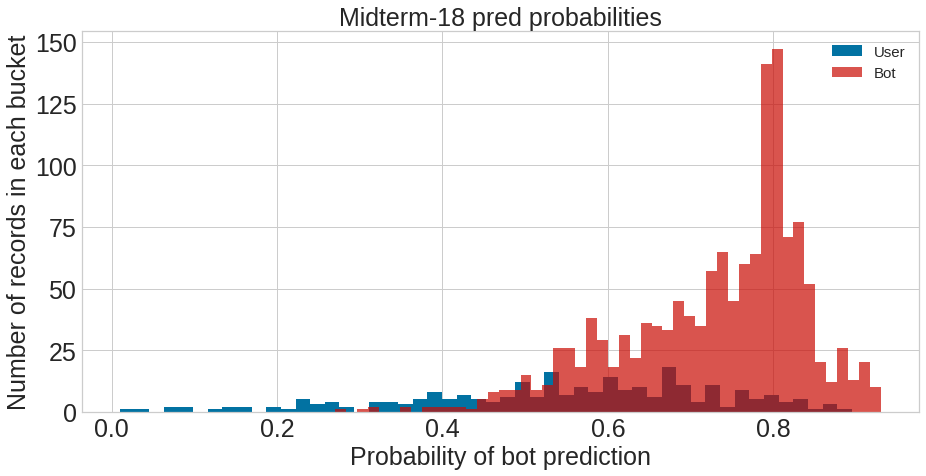

In [181]:
%matplotlib inline
plt = importlib.reload(plt)
prediction = clf.predict_proba(X_midterm18_test.drop(columns=['verified']))[:,1]
plt.figure(figsize=(15,7))
plt.hist(prediction[y_midterm18_test==0], bins=50, label='User')
plt.hist(prediction[y_midterm18_test==1], bins=50, label='Bot', alpha=0.7, color='r')
plt.xlabel('Probability of bot prediction', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.title = matplotlib.pyplot.title
plt.title(label="Midterm-18 pred probabilities", fontsize=25)
plt.show() 

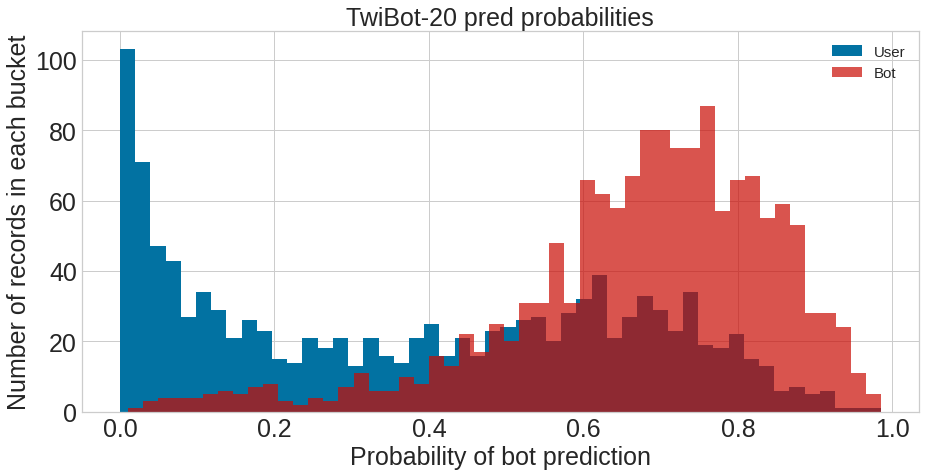

In [182]:
%matplotlib inline
plt = importlib.reload(plt)
prediction = clf.predict_proba(X_twibot20_test.drop(columns=['verified']))[:,1]
plt.figure(figsize=(15,7))
plt.hist(prediction[y_twibot20_test==0], bins=50, label='User')
plt.hist(prediction[y_twibot20_test==1], bins=50, label='Bot', alpha=0.7, color='r')
plt.xlabel('Probability of bot prediction', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.title = matplotlib.pyplot.title
plt.title(label="TwiBot-20 pred probabilities", fontsize=25)
plt.show()

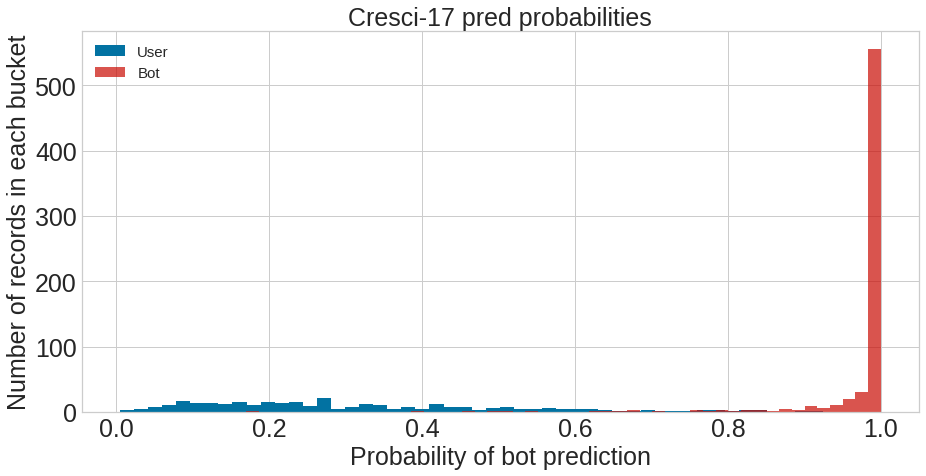

In [183]:
%matplotlib inline
plt = importlib.reload(plt)
prediction = clf.predict_proba(X_cresci17_test.drop(columns=['verified']))[:,1]
plt.figure(figsize=(15,7))
plt.hist(prediction[y_cresci17_test==0], bins=50, label='User')
plt.hist(prediction[y_cresci17_test==1], bins=50, label='Bot', alpha=0.7, color='r')
plt.xlabel('Probability of bot prediction', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.title = matplotlib.pyplot.title
plt.title(label="Cresci-17 pred probabilities", fontsize=25)
plt.show() 

**Prediction with a probability >= 0.6**  
We can reduce the number of false positives (legitimate users classified as bots) by increasing the threshold to classify accounts as bots.

In [188]:
# Twibot + midterm dataset
proba_bound = 0.6

X_twibot20_midterm18_train = pd.concat([X_twibot20_train, X_cresci17_train ]).drop(columns=['verified'])
y_twibot20_midterm18_train = pd.concat([y_twibot20_train, y_cresci17_train]).drop(columns=['verified'])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200, class_weight='balanced')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_midterm18_train, y_twibot20_midterm18_train)

y_midterm18_pred=(clf.predict_proba(X_midterm18_test.drop(columns=['verified']))[:,1] >= proba_bound).astype(int)
y_twibot20_pred=(clf.predict_proba(X_twibot20_test.drop(columns=['verified']))[:,1] >= proba_bound).astype(int)
y_cresci17_pred=(clf.predict_proba(X_cresci17_test.drop(columns=['verified']))[:,1] >= proba_bound).astype(int)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[0, 1]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[0, 1]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[0, 1]))

Accuracy of midterm18: 0.7545454545454545
[[ 144  114]
 [ 291 1101]]
Accuracy on twibot20 : 0.7238636363636364
[[ 847  329]
 [ 400 1064]]
Accuracy on cresci17 : 0.9626262626262626
[[295  32]
 [  5 658]]


We will use this last model to analyze our new 2022 French presidential election dataset.

In [189]:
# Extract the model
import joblib
joblib.dump(clf, 'rf-model.pkl')

['rf-model.pkl']

# Analysis of Presidential22 dataset
This section is used to analyze the Presidential22 dataset

In [190]:
from datasets import load_presidential22, feature_engineering, remove_presidential22_extra_columns

dataset = load_presidential22(floor_nb_tweets=2)
dataset.sample(n=3)

,nb_tweets,matching_rules,probe_date,statuses_count,followers_count,friends_count,favourites_count,listed_count,description,screen_name,name,geo_enabled,verified,created_at,profile_background_tile,profile_use_background_image,default_profile,default_profile_image,url,has_location
1307408399362121728,6,"[{'id': '1505904684699209742', 'tag': 'Anne Hi...",2022-04-08 16:13:44.464245+00:00,13871,69,278,24355,1,,estagnas6400,Maignan,False,False,2020-09-19 19:58:18+00:00,False,True,True,True,None,True
226675191,10,"[{'id': '1505904684699209737', 'tag': 'Jean-Lu...",2022-04-08 16:16:25.341463+00:00,177271,2335,2929,148952,5,🌟🗽🕊☮🏳🍀🐢🏳🗽🗺✨🎋🤍\nTEAM📣#jesuismarcel 🐘🐘\n🧹🧹🗳Macro...,PaflaragePaf,✨🗽☮PAFLARAGE🐢🕊🍁☮✨,False,False,2010-12-14 19:46:24+00:00,True,True,False,False,https://t.co/5vgubBZNvi,True
2433615942,9,"[{'id': '1505904684699209741', 'tag': 'Marine ...",2022-04-08 16:17:06.883784+00:00,23246,4363,2257,17463,50,Conseiller Régional @RNational_off #Occitanie ...,Xavier_Baudry,Xavier Baudry Ⓜ️,True,False,2014-04-08 13:30:44+00:00,False,True,False,False,https://t.co/DLPSUuc0Al,True


In [191]:
dataset = feature_engineering(dataset)
dataset_model = remove_presidential22_extra_columns(dataset)

In [192]:
def to_1D(series):
    return pd.Series([x['tag'] for _list in series for x in _list])

def plot_rules(data_to_plot):
    plt.figure(figsize=(4,2))
    data = to_1D(data_to_plot['matching_rules']).value_counts()
    data["Jean-Luc Mélenchon"] += data["Jean-Luc Melenchon"]
    data = data.drop(["Jean-Luc Melenchon"]).sort_values();
    data.plot(kind='barh')
    plt.title('Nombre de mention des règles par candidat')
    plt.show() 

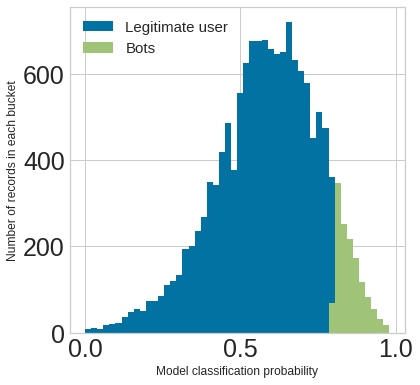

In [193]:
from sklearn.datasets import make_classification
import joblib

import matplotlib.pyplot as plt

clf = joblib.load('rf-model.pkl')
prediction = clf.predict_proba(dataset_model.select_dtypes(include=['int64', 'float64', 'bool']))
threshold = 0.8
bool_mask = prediction[:,1] > threshold
dataset['label'] = bool_mask
dataset['proba'] = prediction[:,1]

prediction=prediction[:,1]

plt.figure(figsize=(6,6))
_,bins,_ = plt.hist(prediction[prediction < 1], bins=50, label='Legitimate user')
plt.hist(prediction[prediction >= threshold], bins=bins, label='Bots')

plt.xlabel('Model classification probability', fontsize=12)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

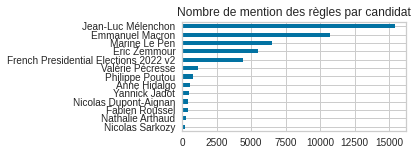

Text(0.5, 0, 'Nombre de votes')

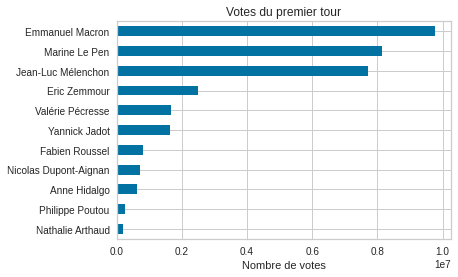

In [197]:
plot_rules(dataset)
list_vote = [("Emmanuel Macron", 9783058), 
                      ("Eric Zemmour", 2485226),
                     ("Marine Le Pen", 8133828),
                     ("Jean-Luc Mélenchon", 7712520),
                     ("Valérie Pécresse", 1679001),
                     ("Philippe Poutou", 268904),
                     ("Anne Hidalgo", 616478),
                     ("Yannick Jadot", 1627853),
                     ("Nicolas Dupont-Aignan", 725176),
                     ("Nathalie Arthaud", 197094),
                     ("Fabien Roussel", 802422)]
idx = [x[0] for x in list_vote]
vals = [x[1] for x in list_vote]

pd.Series(vals, index=idx).sort_values().plot(kind='barh')
plt.title('Votes du premier tour')
plt.xlabel('Nombre de votes')

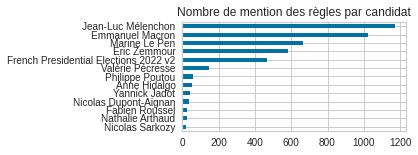

In [198]:
plot_rules(dataset[dataset['label'] == 1])

## Botometer vs datasets analysis

In [ ]:
from datasets import get_botometer_scores

samples = dataset.sample(200)
print(samples['screen_name'].values)

result = get_botometer_scores(samples['screen_name'])
samples['botometer'] = result

valid_result = samples[samples['botometer'] != -1]

In [ ]:
import datetime
import scipy.stats

current_date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

plt.figure(figsize=(6,6))
plt.plot(valid_result['proba'], valid_result['botometer'], 'o', color='black');

plt.ylim(0,5)
plt.xlim(0,1)

plt.xlabel('Model classification probability', fontsize=12)
plt.ylabel('Botometer score', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

valid_result.to_csv('botometer-score-{}.csv'.format(current_date))

#Pearson correlation
print(scipy.stats.pearsonr(valid_result['proba'], valid_result['botometer']))    # Pearson's r
print(scipy.stats.spearmanr(valid_result['proba'], valid_result['botometer']))  # Spearman's rho
print(scipy.stats.kendalltau(valid_result['proba'], valid_result['botometer']))  # Kendall's tau


Result:


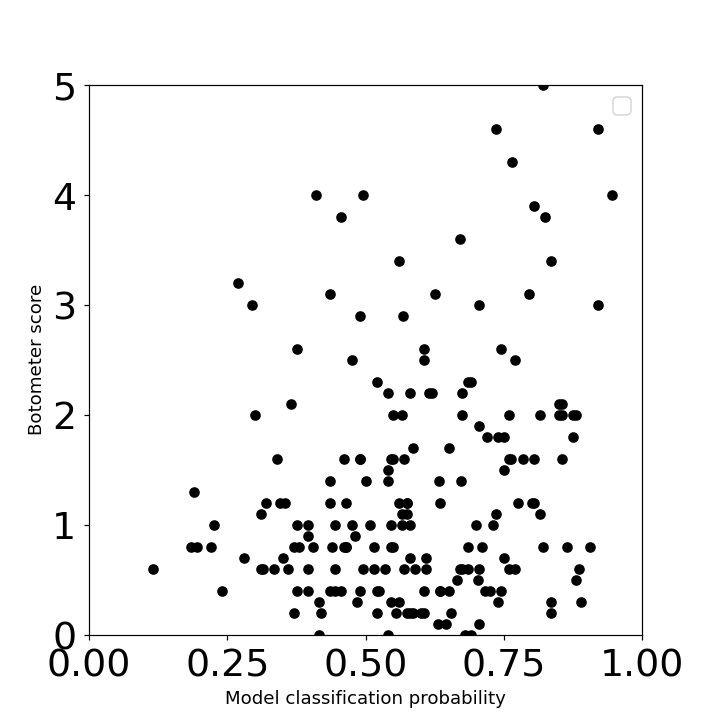

In [199]:
print("Result:")
from IPython.display import Image
Image(filename='botometer_scores.png') 

In [202]:
print('Sample of legitimate users:')
total_score = 0
for idx, profile in dataset[bool_mask == 0].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))
    #result = bom.check_account(profile['screen_name'])
    #print(result['display_scores']['universal']['overall'])
    #total_score += int(result['display_scores']['universal']['overall'])
    #print("\n")
#print("Overall botometer score: " + str(total_score/10.0))

Sample of legitimate users:
https://twitter.com/j_perso
https://twitter.com/firekyubi
https://twitter.com/Ekinorev63
https://twitter.com/PierreChaffard
https://twitter.com/Clyde_Barrow2
https://twitter.com/swaf28137100
https://twitter.com/mamounette4653
https://twitter.com/Ewahellbound
https://twitter.com/Mybozo3
https://twitter.com/quentin_eigen


In [203]:
print('Sample of bot users:')
nb_samples = 10
for idx, profile in dataset[bool_mask == 1].sample(nb_samples).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))
    #result = bom.check_account(profile['screen_name'])
    #print(result['display_scores']['universal']['overall'])
    #total_score += int(result['display_scores']['universal']['overall'])

    #print("\n")
#print("Overall botometer score: " + str(total_score/nb_samples))

Sample of bot users:
https://twitter.com/Nathlry17
https://twitter.com/VIA_Deleg56
https://twitter.com/TALISQUALIS5
https://twitter.com/PaillouxSimon
https://twitter.com/Marieisabelles5
https://twitter.com/veroomrx
https://twitter.com/martine_live
https://twitter.com/IngesLes
https://twitter.com/EddybzhA
https://twitter.com/Babs_cat33


In [ ]:
plt.figure(figsize=(6,6))
samples = prediction.sample(nb_samples)
_,bins,_ = plt.hist(prediction[prediction < 1], bins=50, label='Legitimate user')
plt.hist(prediction[prediction >= threshold], bins=bins, label='Bots')

plt.xlabel('Model classification probability', fontsize=12)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
feature_imp = pd.Series(clf.feature_importances_,index=dataset_model.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()